<a href="https://polly.elucidata.io/manage/workspaces?action=open_polly_notebook&source=github&path=path_place_holder&kernel=elucidata/Metabolomics&machine=large" target="_parent"><img src="https://elucidatainc.github.io/PublicAssets/open_polly.svg" alt="Open in Polly"/></a>


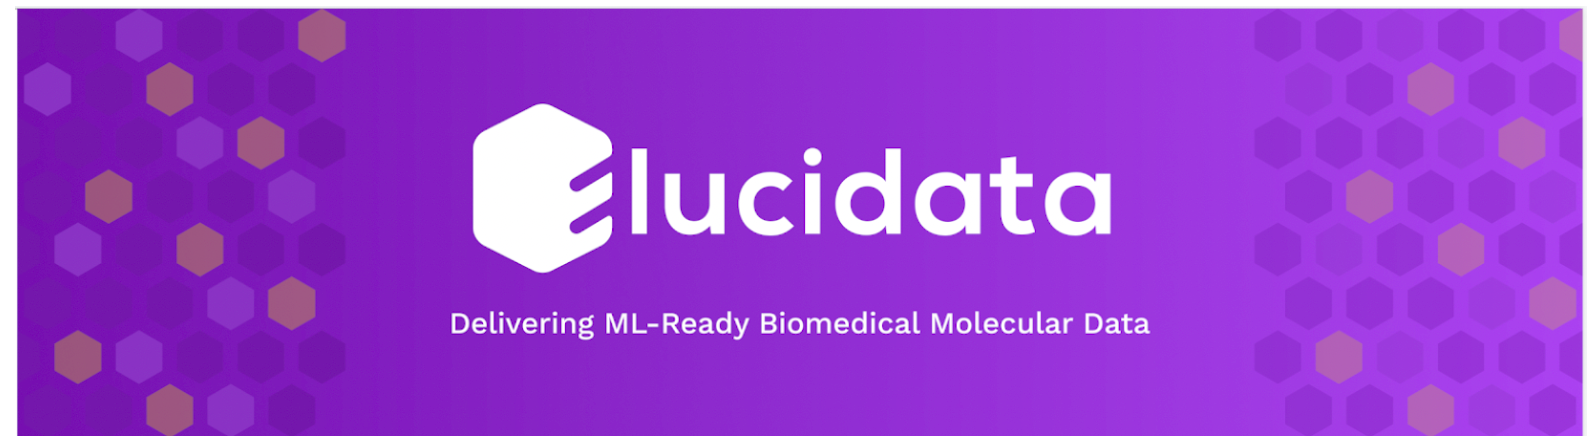

# Welcome to Pollyglot Notebook.

In [3]:
!sudo pip3 install polly-python --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
typer 0.3.2 requires click<7.2.0,>=7.1.1, but you have click 8.0.4 which is incompatible.
You should consider upgrading via the '/usr/bin/python3.6 -m pip install --upgrade pip' command.


In [5]:
from polly.auth import Polly
from polly.omixatlas import OmixAtlas
from polly.workspaces import Workspaces
import os
import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [6]:
AUTH_TOKEN=(os.environ['POLLY_REFRESH_TOKEN']) # Obtain authentication tokens
Polly.auth(AUTH_TOKEN)
omixatlas = OmixAtlas()

### Data Schema
The transcriptomics,metabolomics data available within OmixAtlas is curated within 3 indexes/tables on the basis of the information it contains. These three indexes are:

- Dataset level metadata (index: files): Contains curated fields like drug, disease, tissue organism, etc for each dataset.

- Sample level metadata (index: gct_metadata): As the name suggests, this contains sample level metadata information for all samples except single-cell samples. It contains curated fields like cell lines, experimental design, etc for each sample except single-cell samples.

- Feature level metadata (index: gct_data): This table contains feature level metadata information for all data except single-cell.
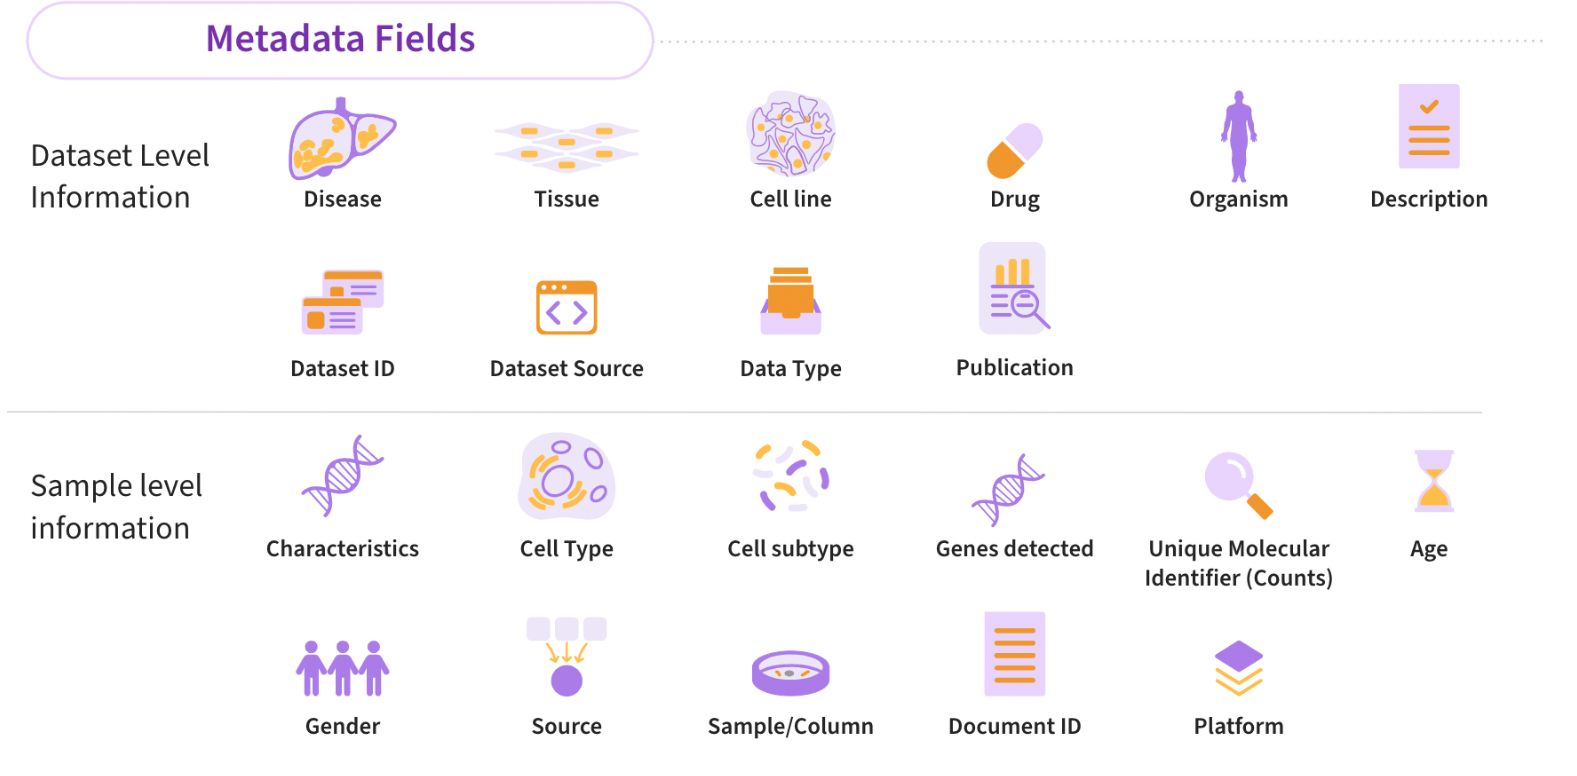

In [9]:
#Metadata tables in Metabolomics OA
query = "SHOW TABLES IN metabolomics"
res = omixatlas.query_metadata(query)
res

Query execution succeeded (time taken: 0.87 seconds, data scanned: 0.000 MB)
Fetched 3 rows


table_name
0  metabolomics.datasets
1   metabolomics.samples
2  metabolomics.features

### Querying dataset-level metadata for a disease of interest

In [9]:
# Dataset level metadata schema for metabolomics OA
query = "DESCRIBE metabolomics.datasets"
res1 = omixatlas.query_metadata(query)
res1.sort_values("column_name")

Query execution succeeded (time taken: 1.52 seconds, data scanned: 0.000 MB)
Fetched 32 rows


column_name    column_type
24         analysis_id         string
3        analysis_type  array<string>
25              bucket         string
5    curated_cell_line  array<string>
14   curated_cell_type  array<string>
21     curated_disease  array<string>
22        curated_drug  array<string>
0     curated_organism  array<string>
26      curated_tissue  array<string>
8      data_table_name         string
9   data_table_version         bigint
28           data_type         string
19          dataset_id         string
27      dataset_source         string
4          description         string
18       file_location         string
12           file_type         string
6      instrument_type  array<string>
20            ion_mode  array<string>
30          is_current         string
15                 key         string
29    measurement_unit         string
17             package         string
11          project_id         string
13         publication  array<string>
31              region         string
16            src_repo         string
1              src_uri         string
7             study_id         string
10          timestamp_         string
2    total_num_samples         bigint
23             version         bigint

In [103]:
disease_name = 'Breast Neoplasms'

In [104]:
#using reccomendation function - searches for realted terms 
query = f"""SELECT dataset_id,disease,organism,tissue,data_type,total_num_samples,data_table_name FROM metabolomics.datasets 
        CROSS JOIN UNNEST(curated_disease) AS t(disease) 
        CROSS JOIN UNNEST(curated_tissue) AS t(tissue) 
        CROSS JOIN UNNEST(curated_organism) AS t(organism)
        WHERE CONTAINS(curated_disease, recommend('curated_disease', '{disease_name}', 'related'))"""
dataset_df = omixatlas.query_metadata(query)
dataset_df

Query execution succeeded (time taken: 2.67 seconds, data scanned: 0.025 MB)
Fetched 23 rows


dataset_id  \
0                MTBLS1066_m_mtbls1066_NEG_HILIC_LCMS   
1                MTBLS1066_m_mtbls1066_NEG_HILIC_LCMS   
2                   MTBLS1066_m_mtbls1066_NEG_RP_LCMS   
3                   MTBLS1066_m_mtbls1066_NEG_RP_LCMS   
4                MTBLS1066_m_mtbls1066_POS_HILIC_LCMS   
5                MTBLS1066_m_mtbls1066_POS_HILIC_LCMS   
6                   MTBLS1066_m_mtbls1066_POS_RP_LCMS   
7                   MTBLS1066_m_mtbls1066_POS_RP_LCMS   
8   MTBLS92_m_breastcancerlipidome_metabolite_prof...   
9   MTBLS92_m_breastcancerlipidome_metabolite_prof...   
10  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
11  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
12  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
13  MTBLS626_m_mtbls626_metabolite_profiling_NMR_s...   
14  MTBLS626_m_mtbls626_metabolite_profiling_NMR_s...   
15  MTBLS626_m_mtbls626_metabolite_profiling_NMR_s...   
16  MTBLS626_m_mtbls626_metabolite_profiling_NMR_s...   
17               MTBLS669_m_mtbls669_NMR_spectroscopy   
18               MTBLS669_m_mtbls669_NMR_spectroscopy   
19               MTBLS669_m_mtbls669_NMR_spectroscopy   
20               MTBLS669_m_mtbls669_NMR_spectroscopy   
21               MTBLS678_m_mtbls678_NMR_spectroscopy   
22               MTBLS678_m_mtbls678_NMR_spectroscopy   

                                    disease      organism         tissue  \
0                                 Neoplasms  Mus musculus   blood plasma   
1                          Breast Neoplasms  Mus musculus   blood plasma   
2                                 Neoplasms  Mus musculus   blood plasma   
3                          Breast Neoplasms  Mus musculus   blood plasma   
4                                 Neoplasms  Mus musculus   blood plasma   
5                          Breast Neoplasms  Mus musculus   blood plasma   
6                                 Neoplasms  Mus musculus   blood plasma   
7                          Breast Neoplasms  Mus musculus   blood plasma   
8                                 Neoplasms  Homo sapiens    blood serum   
9                          Breast Neoplasms  Homo sapiens    blood serum   
10         Triple Negative Breast Neoplasms  Homo sapiens           none   
11                         Breast Neoplasms  Homo sapiens           none   
12                                Neoplasms  Homo sapiens           none   
13                                Neoplasms  Mus musculus  mammary gland   
14                                Neoplasms  Homo sapiens  mammary gland   
15                         Breast Neoplasms  Mus musculus  mammary gland   
16                         Breast Neoplasms  Homo sapiens  mammary gland   
17  Carcinoma, Intraductal, Noninfiltrating  Homo sapiens           none   
18                                  Hypoxia  Homo sapiens           none   
19                         Breast Neoplasms  Homo sapiens           none   
20                                Neoplasms  Homo sapiens           none   
21         Triple Negative Breast Neoplasms  Homo sapiens           none   
22                                Neoplasms  Homo sapiens           none   

       data_type  total_num_samples  \
0   Metabolomics                  7   
1   Metabolomics                  7   
2   Metabolomics                  7   
3   Metabolomics                  7   
4   Metabolomics                  7   
5   Metabolomics                  7   
6   Metabolomics                  7   
7   Metabolomics                  7   
8     Lipidomics                447   
9     Lipidomics                447   
10  Metabolomics                 27   
11  Metabolomics                 27   
12  Metabolomics                 27   
13  Metabolomics                144   
14  Metabolomics                144   
15  Metabolomics                144   
16  Metabolomics                144   
17  Metabolomics                 12   
18  Metabolomics                 12   
19  Metabolomics                 12   
20  Metabolomics              

### Querying sample-level metadata for a dataset of interest

In [31]:
# Sample level metadata schema for metabolomics OA
query = "DESCRIBE metabolomics.samples"
res2 = omixatlas.query_metadata(query)
res2.sort_values("column_name")

Query execution succeeded (time taken: 1.62 seconds, data scanned: 0.000 MB)
Fetched 23 rows


column_name    column_type
14                          cohort_id         bigint
11                        cohort_name         string
10                            control         bigint
6                   curated_cell_line         string
21                  curated_cell_type         string
7                 curated_cohort_name         string
12                    curated_control         bigint
8                     curated_disease         string
9                        curated_drug         string
5               curated_gene_modified         string
20  curated_genetic_modification_type         string
17                     curated_tissue         string
18                            data_id         string
3                          dataset_id  array<string>
1                              id_key         string
22                         is_current         string
19                               name         string
4                           sample_id         string
13                     src_dataset_id         string
0                            src_repo         string
2                             src_uri         string
16                         timestamp_         string
15                            version         bigint

In [29]:
query = """SELECT src_dataset_id,sample_id,curated_disease,curated_tissue,curated_cell_line FROM metabolomics.samples 
        WHERE src_dataset_id = 'MTBLS337_m_breast_cancer_metabolomics_metabolite_profiling_NMR_spectroscopy'"""
samples_df = omixatlas.query_metadata(query)
samples_df

Query execution succeeded (time taken: 1.31 seconds, data scanned: 0.527 MB)
Fetched 27 rows


src_dataset_id     sample_id  \
0   MTBLS337_m_breast_cancer_metabolomics_metaboli...    HCC1937_C1   
1   MTBLS337_m_breast_cancer_metabolomics_metaboli...    HCC1937_C2   
2   MTBLS337_m_breast_cancer_metabolomics_metaboli...    HCC1937_C3   
3   MTBLS337_m_breast_cancer_metabolomics_metaboli...   HCC1937_PI1   
4   MTBLS337_m_breast_cancer_metabolomics_metaboli...   HCC1937_PI2   
5   MTBLS337_m_breast_cancer_metabolomics_metaboli...   HCC1937_PI3   
6   MTBLS337_m_breast_cancer_metabolomics_metaboli...    HCC1937_R1   
7   MTBLS337_m_breast_cancer_metabolomics_metaboli...    HCC1937_R2   
8   MTBLS337_m_breast_cancer_metabolomics_metaboli...    HCC1937_R3   
9   MTBLS337_m_breast_cancer_metabolomics_metaboli...       MCF7_C1   
10  MTBLS337_m_breast_cancer_metabolomics_metaboli...       MCF7_C2   
11  MTBLS337_m_breast_cancer_metabolomics_metaboli...       MCF7_C3   
12  MTBLS337_m_breast_cancer_metabolomics_metaboli...      MCF7_PI1   
13  MTBLS337_m_breast_cancer_metabolomics_metaboli...      MCF7_PI2   
14  MTBLS337_m_breast_cancer_metabolomics_metaboli...      MCF7_PI3   
15  MTBLS337_m_breast_cancer_metabolomics_metaboli...       MCF7_R1   
16  MTBLS337_m_breast_cancer_metabolomics_metaboli...       MCF7_R2   
17  MTBLS337_m_breast_cancer_metabolomics_metaboli...       MCF7_R3   
18  MTBLS337_m_breast_cancer_metabolomics_metaboli...   MDAMB231_C1   
19  MTBLS337_m_breast_cancer_metabolomics_metaboli...   MDAMB231_C2   
20  MTBLS337_m_breast_cancer_metabolomics_metaboli...   MDAMB231_C3   
21  MTBLS337_m_breast_cancer_metabolomics_metaboli...  MDAMB231_PI1   
22  MTBLS337_m_breast_cancer_metabolomics_metaboli...  MDAMB231_PI2   
23  MTBLS337_m_breast_cancer_metabolomics_metaboli...  MDAMB231_PI3   
24  MTBLS337_m_breast_cancer_metabolomics_metaboli...   MDAMB231_R1   
25  MTBLS337_m_breast_cancer_metabolomics_metaboli...   MDAMB231_R2   
26  MTBLS337_m_breast_cancer_metabolomics_metaboli...   MDAMB231_R3   

   curated_disease curated_tissue curated_cell_line  
0           Normal           none     HCC-1937 cell  
1           Normal           none     HCC-1937 cell  
2           Normal           none     HCC-1937 cell  
3           Normal           none     HCC-1937 cell  
4           Normal           none     HCC-1937 cell  
5           Normal           none     HCC-1937 cell  
6           Normal           none     HCC-1937 cell  
7           Normal           none     HCC-1937 cell  
8           Normal           none     HCC-1937 cell  
9           Normal           none        MCF-7 cell  
10          Normal           none        MCF-7 cell  
11          Normal           none        MCF-7 cell  
12          Normal           none        MCF-7 cell  
13          Normal           none        MCF-7 cell  
14          Normal           none        MCF-7 cell  
15          Normal           none        MCF-7 cell  
16          Normal           none        MCF-7 cell  
17          Normal           none        MCF-7 cell  
18          Normal           none   MDA-MB-231 cell  
19          Normal           none   MDA-MB-231 cell  
20          Normal           none   MDA-MB-231 cell  
21          Normal           none   MDA-MB-231 cell  
22          Normal           none   MDA-MB-231 cell  
23          Normal           none   MDA-MB-231 cell  
24          Normal           none   MDA-MB-231 cell  
25          Normal           none   MDA-MB-231 cell  
26          Normal           none   MDA-MB-231 cell

### Querying feature-level metadata for a dataset of interest

In [7]:
query = "DESCRIBE metabolomics.features"
res3 = omixatlas.query_metadata(query)
res3.sort_values("column_name")

Query execution succeeded (time taken: 2.04 seconds, data scanned: 0.000 MB)
Fetched 13 rows


column_name column_type
10         data_id      string
5       dataset_id      string
0       feature_id      string
6    feature_value      double
2           id_key      string
12      is_current      string
11            name      string
4        sample_id      string
7   src_dataset_id      string
1         src_repo      string
3          src_uri      string
9       timestamp_      string
8          version      bigint

In [32]:
query = "SELECT src_dataset_id,data_id FROM metabolomics.features WHERE src_dataset_id = 'MTBLS337_m_breast_cancer_metabolomics_metabolite_profiling_NMR_spectroscopy'"
feature_df = omixatlas.query_metadata(query)
feature_df

Query execution succeeded (time taken: 1.64 seconds, data scanned: 2.871 MB)
Fetched 39 rows


src_dataset_id  \
0   MTBLS337_m_breast_cancer_metabolomics_metaboli...   
1   MTBLS337_m_breast_cancer_metabolomics_metaboli...   
2   MTBLS337_m_breast_cancer_metabolomics_metaboli...   
3   MTBLS337_m_breast_cancer_metabolomics_metaboli...   
4   MTBLS337_m_breast_cancer_metabolomics_metaboli...   
5   MTBLS337_m_breast_cancer_metabolomics_metaboli...   
6   MTBLS337_m_breast_cancer_metabolomics_metaboli...   
7   MTBLS337_m_breast_cancer_metabolomics_metaboli...   
8   MTBLS337_m_breast_cancer_metabolomics_metaboli...   
9   MTBLS337_m_breast_cancer_metabolomics_metaboli...   
10  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
11  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
12  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
13  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
14  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
15  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
16  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
17  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
18  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
19  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
20  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
21  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
22  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
23  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
24  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
25  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
26  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
27  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
28  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
29  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
30  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
31  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
32  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
33  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
34  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
35  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
36  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
37  MTBLS337_m_breast_cancer_metabolomics_metaboli...   
38  MTBLS337_m_breast_cancer_metabolomics_metaboli...   

                                    data_id  
0         _1_methylnicotinamide_chebi_16797  
1               _2_aminoadipate_chebi_37024  
2             _2_oxoisocaproate_chebi_48430  
3                     l_alanine_chebi_16977  
4       adenosine_monophosphate_chebi_16027  
5                  l_asparagine_chebi_17196  
6                   l_aspartate_chebi_17053  
7        adenosine_triphosphate_chebi_15422  
8                      creatine_chebi_16919  
9            creatine_phosphate_chebi_17287  
10                      formate_chebi_30751  
11                     fumarate_chebi_18012  
12                   d_glucitol_chebi_17924  
13                     d_glucose_chebi_4167  
14              l_glutamic_acid_chebi_16015  
15                  l_glutamine_chebi_18050  
16                  glutathione_chebi_16856  
17                      glycine_chebi_15428  
18                 l_isoleucine_chebi_17191  
19                      lactate_chebi_78320  
20                    l_leucine_chebi_15603  
21                     l_lysine_chebi_18019  
22                 l_methionine_chebi_16643  
23                 myo_inositol_chebi_17268  
24                          nad_chebi_44215  
25             o_phosphocholine_chebi_18132  
26                  pantothenate_chebi_7916  
27              l_phenylalanine_chebi_17295  
28                    l_proline_chebi_17203  
29            pyroglutamic_acid_chebi_16010  
30                       serine_chebi_17822  
31  sn_glycero_3_phosphocholine_chebi_16870  
32                      taurine_chebi_15891  
33                  l_threonine_chebi_16857  
34                 l_tryptophan_chebi_16828  
35                   l_tyrosine_chebi_17895  
36      udp_n_acetylglucosamine_chebi_16264  
37        

### Querying data matrix of dataset of interest

In [33]:
query = "SELECT * FROM data_matrices.metabolomics__mtbls337_m_breast_cancer_metabolomics_metabolite_profiling_nmr_spectroscopy"
data_df = omixatlas.query_metadata(query)
data_df

Query execution succeeded (time taken: 1.07 seconds, data scanned: 0.007 MB)
Fetched 39 rows


rid  hcc1937_c1  hcc1937_c2  \
0          1-Methylnicotinamide_CHEBI:16797         0.0         0.0   
1                2-Aminoadipate_CHEBI:37024         0.0         0.0   
2              2-Oxoisocaproate_CHEBI:48430         0.0         0.0   
3                     L-Alanine_CHEBI:16977       396.7       381.1   
4       Adenosine monophosphate_CHEBI:16027        11.6        12.5   
5                  L-Asparagine_CHEBI:17196        13.5        13.5   
6                   L-Aspartate_CHEBI:17053       103.7        99.9   
7        Adenosine triphosphate_CHEBI:15422        66.3        61.6   
8                      Creatine_CHEBI:16919        22.5        22.5   
9            Creatine phosphate_CHEBI:17287        23.5        21.6   
10                      Formate_CHEBI:30751        14.5        16.1   
11                     Fumarate_CHEBI:18012         3.4         3.6   
12                   D-Glucitol_CHEBI:17924         0.0         0.0   
13                     D-Glucose_CHEBI:4167       168.0       201.4   
14              L-Glutamic acid_CHEBI:16015       368.0       351.9   
15                  L-Glutamine_CHEBI:18050       450.2       449.7   
16                  Glutathione_CHEBI:16856       207.4       196.4   
17                      Glycine_CHEBI:15428       561.5       550.2   
18                 L-Isoleucine_CHEBI:17191        68.7        67.4   
19                      Lactate_CHEBI:78320       402.9       447.2   
20                    L-Leucine_CHEBI:15603        54.4        53.8   
21                     L-Lysine_CHEBI:18019        25.4        25.2   
22                 L-Methionine_CHEBI:16643        18.4        20.5   
23                 myo-Inositol_CHEBI:17268       248.0       249.6   
24                          NAD_CHEBI:44215        24.6        24.2   
25             O-Phosphocholine_CHEBI:18132       363.5       353.6   
26                  Pantothenate_CHEBI:7916        21.2        21.3   
27              L-Phenylalanine_CHEBI:17295        50.7        51.4   
28                    L-Proline_CHEBI:17203        44.1        44.7   
29            Pyroglutamic acid_CHEBI:16010        36.6        34.9   
30                       Serine_CHEBI:17822       123.1       130.7   
31  sn-Glycero-3-phosphocholine_CHEBI:16870       154.1       150.1   
32                      Taurine_CHEBI:15891       151.1       150.7   
33                  L-Threonine_CHEBI:16857       168.2       169.4   
34                 L-Tryptophan_CHEBI:16828        11.0        12.7   
35                   L-Tyrosine_CHEBI:17895        42.6        40.7   
36      UDP-N-Acetylglucosamine_CHEBI:16264        63.2        61.7   
37                     L-Valine_CHEBI:16414        69.8        69.6   
38                 beta-Alanine_CHEBI:16958        12.4        12.7   

    hcc1937_c3  hcc1937_pi1  hcc1937_pi2  hcc1937_pi3  hcc1937_r1  hcc1937_r2  \
0          0.0          0.0          0.0          0.0         0.0         0.0   
1          0.0          0.0          0.0          0.0         0.0         0.0   
2          0.0          0.0          0.0          0.0         0.0         0.0   
3        403.8        393.8        370.9        380.6       425.1       437.8   
4         13.1          6.6          9.2          6.6         7.1         8.9   
5         14.3          8.7         11.2         11.0        11.6        12.5   
6         94.0         89.6         80.8         90.3       105.1        98.1   
7         67.8         75.7         67.7         71.9        70.8        65.7   
8         21.1         19.9         20.1         20.4        22.5        24.3   
9         24.5         27.7         24.6         26.9        23.2        27.6   
10        13.8         16.7         17.8         17.0        18.6        20.2   
11         3.8          3.2          3.0          3.1         3.8         3.9   
12         0.0          0.0          0.0          0.0         0.0         0.0   
13       206.8        213.4        170.4        194.4       312.2

In [34]:
#making sample id comsistent across sample metadata and data matrix
samples_df['sample_id'] = samples_df['sample_id'].str.lower()

### Visualisations and Analysis
- PCA plot
- Comparing levels of a metabolite of interest across an attribute
- Differential analysis using Limma
- Performing MSEA
- Visualising differential expression in KEGG pathway

### PCA plot

In [35]:
#PCA plot
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=2)
features_pca = pca.fit_transform(data_df.drop(['rid','row_id'],axis=1).transpose())

fig = px.scatter(features_pca, x=0, y=1, color=samples_df['curated_cell_line'])
fig.show()

### Comparing levels of a metabolite of interest across an attribute

In [37]:
#make sure sample ids are consistent in the data and the metadata file
samples_df.to_csv('met_metadata.csv',index=False)
data_df[data_df.index == 33].to_csv('met_data.csv',index=False) #data values for one of the metabolites

Using rid, row_id as id variables



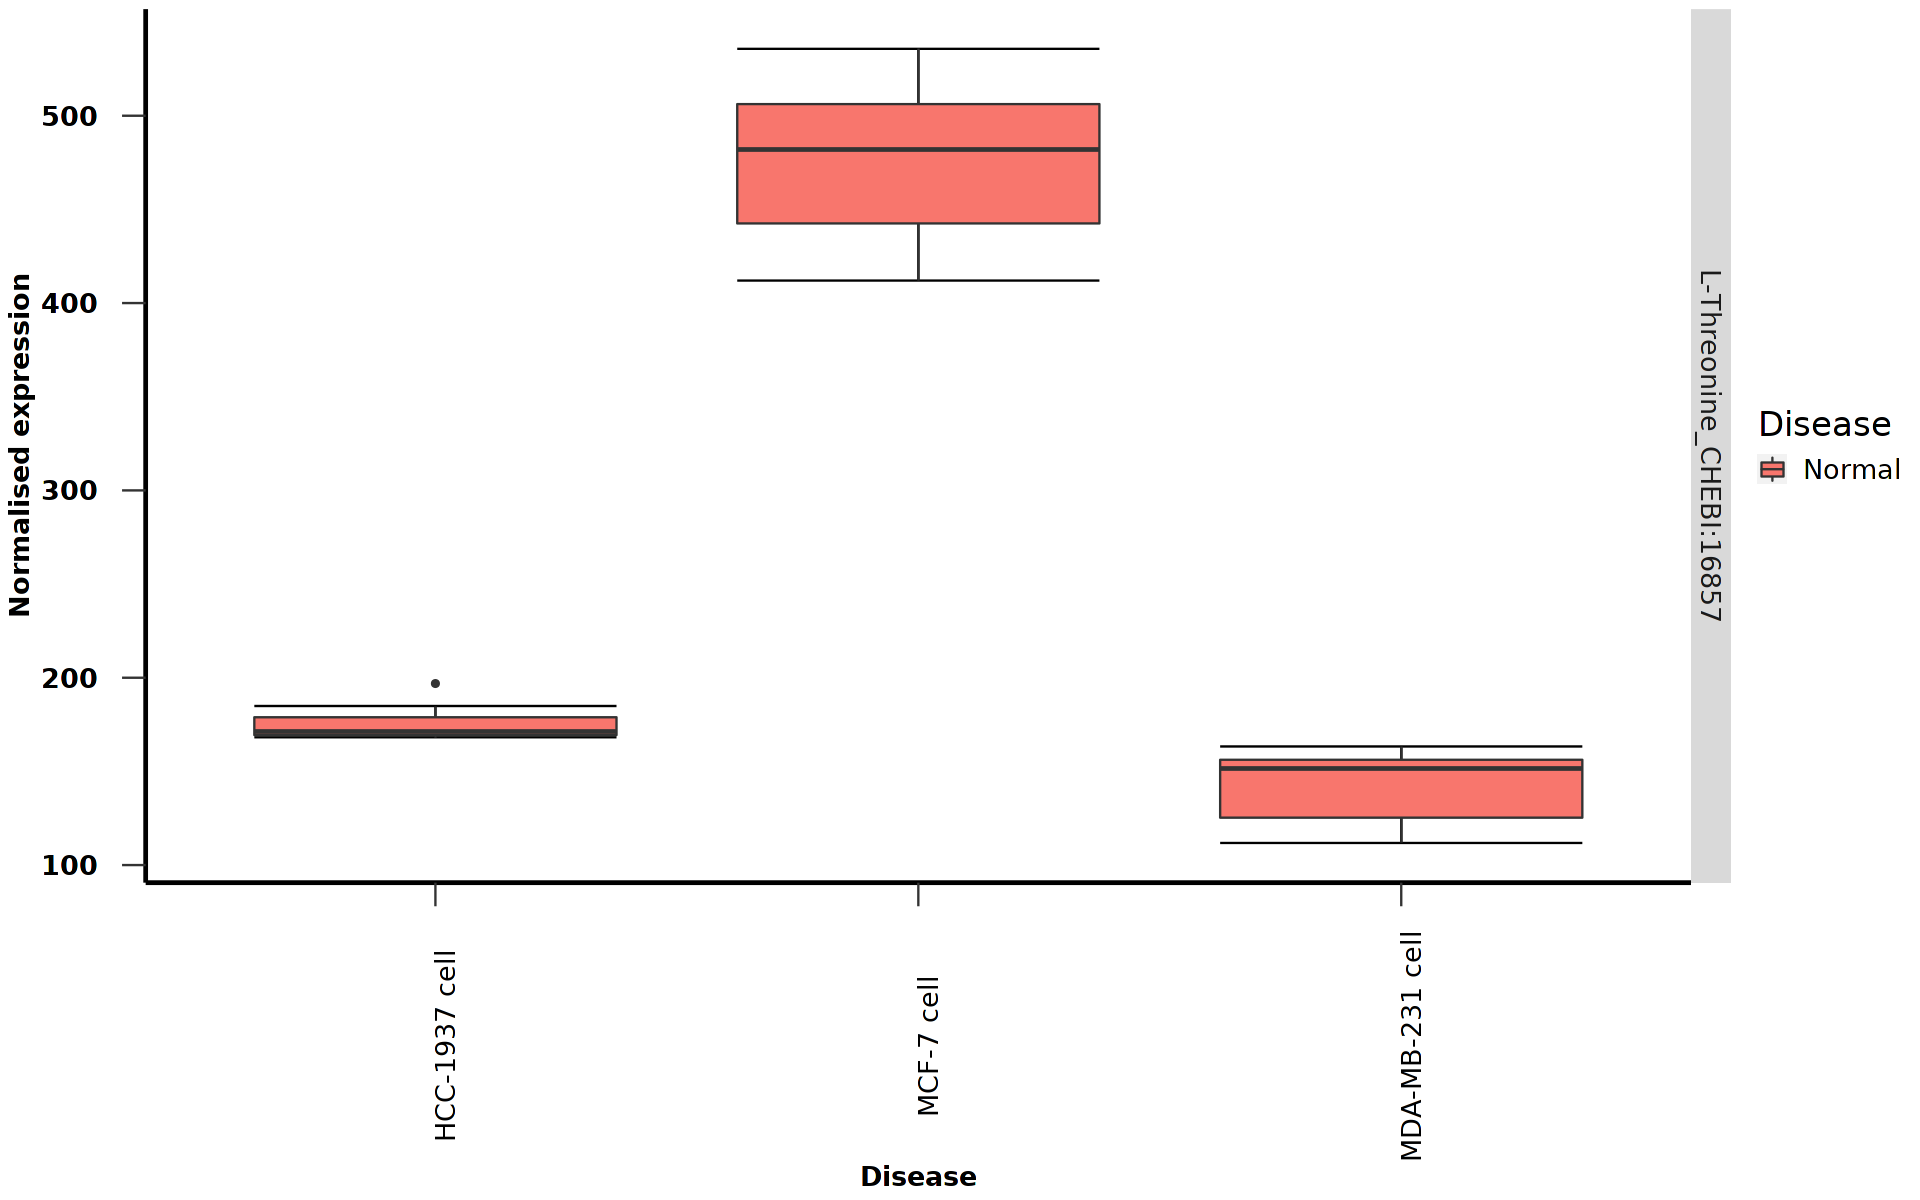

In [40]:
## Plotting levels of metabolite across cell line

library(ggplot2)

input_matrix <-reshape2::melt(read.csv("met_data.csv"))

metadata <-read.csv("met_metadata.csv")

input_matrix  <- cbind(input_matrix,metadata)
# Run script

plot_boxplot <- function(df, x_col, y_col,facet_by){
  require(ggplot2)
  
  # color lables for filling
  fill <- "#4271AE"
  lines <- "#1F3552"

  # function for plottings
  p <- ggplot(df) + aes(x = as.factor(df[,x_col]), y = df[,y_col]) + 
    stat_boxplot(geom ='errorbar') + # Adding horizontal bars
    geom_boxplot(aes(fill=curated_disease)) + # boxplot function with black borders 
    labs(x="Disease", y="Normalised expression",fill="Disease") +# x-axis labels 
    theme(panel.grid.major = element_blank(), # no major grids
          panel.grid.minor = element_blank(), # no minor grids
          panel.border = element_blank(), # no border
          panel.background = element_blank(), # no background 
          axis.title = element_text(colour="black", size = 16, face = "bold"), # axis title 
          axis.text.x = element_text(colour="black", size = 16, margin=unit(c(0.5,0.5,0.1,0.1), "cm"),angle=90), # x-axis text in fontsize 10
          axis.text.y = element_text(colour="black", size = 16, margin=unit(c(0.5,0.5,0.1,0.1), "cm"), face = "bold"), # y-axis text in fontsize 10
          axis.line = element_line(size=1, colour = "black"), # axis line defined
          axis.ticks.length = unit(0.5, "cm"),
          text = element_text(size = 20))  # ticks facing inward with 0.25cm length
  p <- p + facet_grid(rid~.)
  return(p)
}
options(repr.plot.width=16, repr.plot.height=10)
plot_boxplot(input_matrix, "curated_cell_line", "value","rid")

### Differential analysis using Limma

In [41]:
data_df.to_csv('met_data.csv',index=False)
samples_df.to_csv('met_metadata.csv',index=False)

In [43]:
#Differential Expression

#Read files 
metadata_met <- read.csv('met_metadata.csv')
metadata_met1 <- metadata_met[,-2]
rownames(metadata_met1) <- metadata_met[,2] 

data_met <- read.csv('met_data.csv')
data_met1 <- data_met[,-1]
rownames(data_met1) <- data_met[,1] 

# Run script

diff_exp_limma <- function(data_matrix, metadata, cohortCol, cohort_a, cohort_b, p_val_correct_methods) {
    
    # Subset the metadata dataframe to have samples from the provided cohorts only
    metadata <- metadata[metadata[, cohortCol] %in% c(cohort_a, cohort_b),]
    # Create a comparison column
    metadata[, "comparison"] <- NA
    metadata[metadata[, cohortCol] %in% cohort_a, "comparison"] <- "A"
    metadata[metadata[, cohortCol] %in% cohort_b, "comparison"] <- "B"
    
    condition <- metadata[, "comparison"]
    ### Creating design matrix of comparisons required (without batch)
    design <- model.matrix(~ condition + 0)
    colnames(design) <- gsub("condition", "", colnames(design))
    contrast_matrix <- limma::makeContrasts(contrasts = c(paste("B", "A", sep = "-")), levels = design)

    data_matrix <- data_matrix[, rownames(metadata)]
    data_matrix <- data_matrix[!apply(data_matrix, 1, anyNA), ]

    ### Fitting linear model to log2 normalised expression data
    fit <- limma::lmFit(data_matrix, design)
    fit <- limma::contrasts.fit(fit, contrast_matrix)
    fit <- limma::eBayes(fit)
    limma_results_df <- limma::topTable(fit, coef = paste("B", "A", sep = "-"), number = nrow(data_matrix))

    ### p value correction
    for (p_val_correct in p_val_correct_methods) {
        if (p_val_correct == "Bonferroni") {
            p_val_correct_method <- "bonferroni"
        }else {
            p_val_correct_method <- "BH"
        }    
        limma_results_df[, p_val_correct] <- p.adjust(limma_results_df$P.Value, method = p_val_correct_method)
    }
    return(limma_results_df)
}

diff_exp_matrix <- diff_exp_limma(data_met1, metadata_met1, 'curated_cell_line', 'HCC-1937 cell', 'MCF-7 cell', 'BH')
diff_exp_matrix

Warning message:
“Zero sample variances detected, have been offset away from zero”


logFC       AveExpr     t         
beta-Alanine_CHEBI:16958                 -13.322222    6.661111 -48.116151
L-Asparagine_CHEBI:17196                  35.688889   30.033333  26.008087
NAD_CHEBI:44215                           24.155556   37.544444  21.756250
L-Proline_CHEBI:17203                     85.177778   89.900000  20.887545
L-Lysine_CHEBI:18019                     100.055556   76.561111  20.565697
L-Threonine_CHEBI:16857                  296.222222  324.100000  19.801519
L-Methionine_CHEBI:16643                 169.511111  106.933333  19.563843
Taurine_CHEBI:15891                      123.866667  223.944444  19.067959
L-Leucine_CHEBI:15603                    169.955556  140.144444  19.053618
Glycine_CHEBI:15428                      773.288889 1065.155556  18.313546
L-Aspartate_CHEBI:17053                  223.544444  207.316667  18.082490
L-Tyrosine_CHEBI:17895                   177.877778  130.005556  17.592594
L-Glutamine_CHEBI:18050                  593.555556  770.511111  17.351121
Pantothenate_CHEBI:7916                  -15.277778   13.627778 -17.289683
L-Tryptophan_CHEBI:16828                  49.188889   35.316667  17.148086
2-Oxoisocaproate_CHEBI:48430              10.600000    5.300000  17.104892
L-Glutamic acid_CHEBI:16015              497.911111  602.022222  16.753014
UDP-N-Acetylglucosamine_CHEBI:16264      115.911111  123.055556  16.493968
L-Isoleucine_CHEBI:17191                 214.077778  179.261111  16.367409
L-Phenylalanine_CHEBI:17295              243.566667  171.605556  16.309983
myo-Inositol_CHEBI:17268                -142.233333  201.772222 -15.503892
L-Valine_CHEBI:16414                     219.155556  183.133333  15.466025
Pyroglutamic acid_CHEBI:16010             50.755556   65.822222  15.343107
Adenosine triphosphate_CHEBI:15422        66.922222  101.516667  14.104590
Adenosine monophosphate_CHEBI:16027       -9.522222    4.761111 -11.408381
O-Phosphocholine_CHEBI:18132             169.544444  443.727778  10.969776
Creatine phosphate_CHEBI:17287            16.688889   33.611111   9.547933
Glutathione_CHEBI:16856                   69.122222  237.561111   7.627703
sn-Glycero-3-phosphocholine_CHEBI:16870  -43.955556  139.255556  -7.627153
Creatine_CHEBI:16919                       8.211111   25.927778   5.824279
Serine_CHEBI:17822                       -22.666667  129.400000  -3.494357
Lactate_CHEBI:78320                     -122.200000  434.444444  -3.102187
L-Alanine_CHEBI:16977                     84.977778  445.122222   3.008518
Formate_CHEBI:30751                        5.466667   19.788889   2.775695
D-Glucose_CHEBI:4167                      99.455556  280.305556   2.770631
Fumarate_CHEBI:18012                      -0.500000    3.250000  -1.827734
1-Methylnicotinamide_CHEBI:16797           0.000000    0.000000   0.000000
2-Aminoadipate_CHEBI:37024                 0.000000    0.000000   0.000000
D-Glucitol_CHEBI:17924                     0.000000    0.000000   0.000000
                                        P.Value      adj.P.Val    B        
beta-Alanine_CHEBI:16958                3.429304e-19 1.337429e-17 18.806919
L-Asparagine_CHEBI:17196                7.766249e-15 1.514419e-13 16.698049
NAD_CHEBI:44215                         1.367935e-13 1.778316e-12 15.656895
L-Proline_CHEBI:17203                   2.622041e-13 2.556490e-12 15.387073
L-Lysine_CHEBI:18019                    3.358302e-13 2.619475e-12 15.281051
L-Threonine_CHEBI:16857                 6.133421e-13 3.986724e-12 15.015120
L-Methionine_CHEBI:16643                7.429607e-13 4.139352e-12 14.928108
Taurine_CHEBI:15891                     1.116165e-12 4.894688e-12 14.739579
L-Leucine_CHEBI:15603                   1.129543e-12 4.894688e-12 14.733982
Glycine_CHEBI:15428                     2.113022e-12 8.240786e-12 14.433471
L-Aspartate_CHEBI:17053                 2.581559e-12 9.152799e-12 14.334764
L-Tyrosine_CHEBI:17895                  3.978202e-12 1.292916e-11 14.117304
L-Glutamine_CHEBI:18050                 4.943165e-12

### Performing MSEA 
- MSEA helps in identifying and interpreting patterns of human or mammalian metabolite concentration changes in a biologically meaningful context
    - MSEA offers three different enrichment analyses for metabolomic studies 
        - Overrepresentation analysis (ORA) - Requires only compound names
        - Single sample profiling (SSP) - Requires compound names and compound concentrations
        - Quantitative enrichment analysis (QEA) -  Requires compound names and compound concentrations
- The below function for MSEA performs ORA
- References
     - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2896187/
     - https://www.metaboanalyst.ca/docs/RTutorial.xhtml

In [48]:
perform_MSEA <- function(data_matrix) {
    library("MetaboAnalystR")
    library(png)
    metabolites <- c()
    for (compound in rownames(data_matrix)){
        name <- strsplit(compound,'_')[[1]][1]
        metabolites<- c(name,metabolites)
    }
    tmp.vec <- metabolites
    mSet<-InitDataObjects("conc", "pathora", FALSE) 
    mSet<-Setup.MapData(mSet, tmp.vec)
    mSet<-CrossReferencing(mSet, "name")
    mSet<-CreateMappingResultTable(mSet)
    # Use "current" for the latest KEGG pathway library or "v2018" for the KEGG pathway library version prior to November 2019.
    mSet<-SetKEGG.PathLib(mSet, "hsa", "current")
    # Set the metabolite filter
    mSet<-SetMetabolomeFilter(mSet, F)
    mSet<-SetCurrentMsetLib(mSet, "kegg_pathway", 2);
    # Calculate hypergeometric score, results table generated in your working directory
    mSet<-CalculateHyperScore(mSet)
    # Plot the ORA, bar-graph
    mSet<-PlotORA(mSet, "msea_results_", "bar", "png", 72, width=NA)
    img <- readPNG('msea_results_dpi72.png')
    grid::grid.raster(img)
    print('MSEA results stored in msea_ora_result.csv file')
    print('Compound mapping stored in name_map.csv file') 
}

[1] "Please download the sqlite zipped folder from Google Drive (link in vignette) and \n          create an R objected named url.pre with the path to the sqlite folder."
[1] "MetaboAnalyst R objects initialized ..."
[1] "Loaded files from MetaboAnalyst web-server."
[1] "Loaded files from MetaboAnalyst web-server."
[1] "1"                                                                              
[2] "Name matching OK, please inspect (and manual correct) the results then proceed."
[1] "Loaded files from MetaboAnalyst web-server."
[1] "Loaded files from MetaboAnalyst web-server."
[1] "http://api.xialab.ca/msetora"
[1] "Mset ORA via api.metaboanalyst.ca successful!"


Warning message in space + width:
“longer object length is not a multiple of shorter object length”
Warning message in space + width:
“longer object length is not a multiple of shorter object length”


[1] "MSEA results stored in msea_ora_result.csv file"
[1] "Compound mapping stored in name_map.csv file"


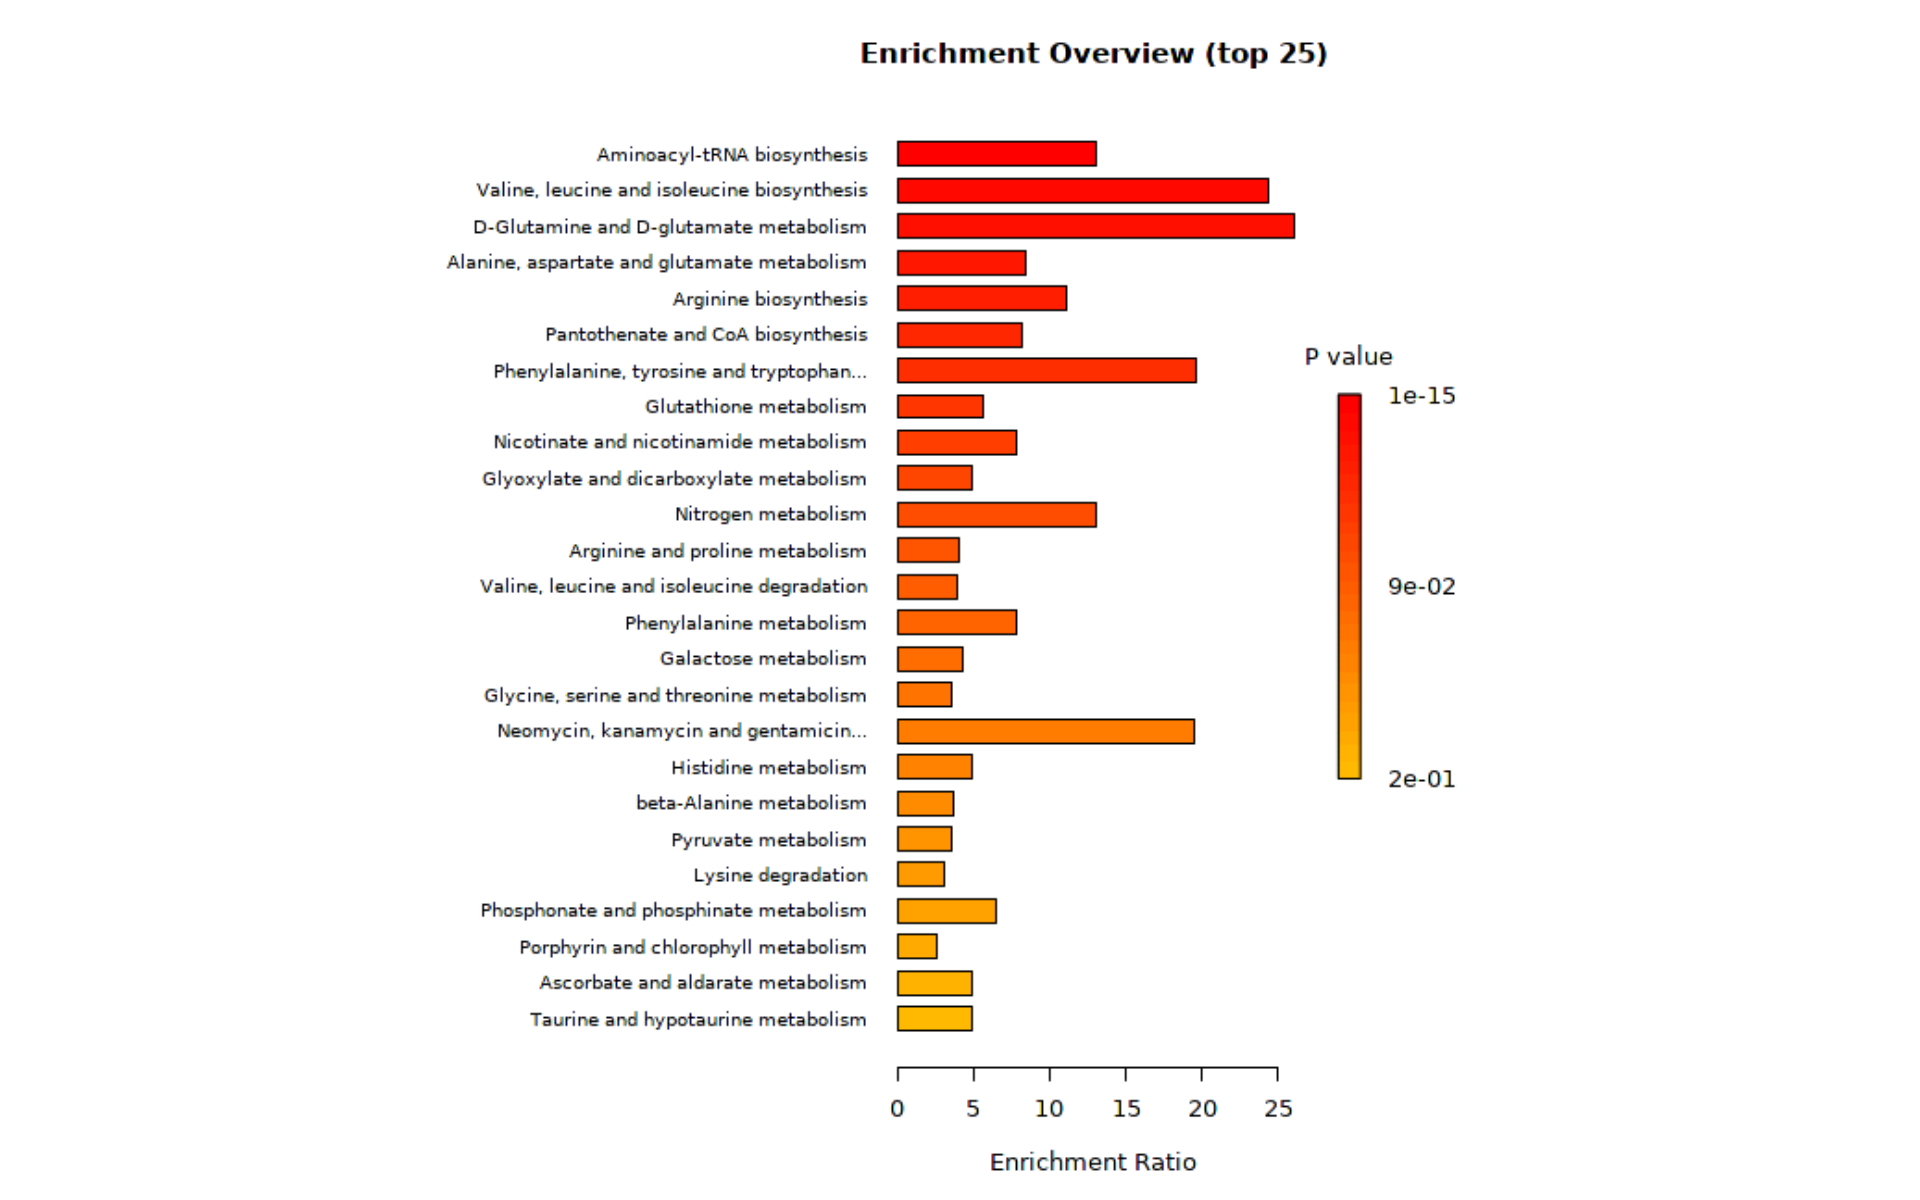

In [49]:
perform_MSEA(data_met1)

In [50]:
#result files gnerated
msea_res <- read.csv('msea_ora_result.csv')
name_map <- read.csv('name_map.csv')

In [51]:
msea_res

X                                                      total expected hits
1  Aminoacyl-tRNA biosynthesis                            48    1.2300   16  
2  Valine, leucine and isoleucine biosynthesis             8    0.2050    5  
3  D-Glutamine and D-glutamate metabolism                  6    0.1540    4  
4  Alanine, aspartate and glutamate metabolism            28    0.7170    6  
5  Arginine biosynthesis                                  14    0.3590    4  
6  Pantothenate and CoA biosynthesis                      19    0.4870    4  
7  Phenylalanine, tyrosine and tryptophan biosynthesis     4    0.1020    2  
8  Glutathione metabolism                                 28    0.7170    4  
9  Nicotinate and nicotinamide metabolism                 15    0.3840    3  
10 Glyoxylate and dicarboxylate metabolism                32    0.8200    4  
11 Nitrogen metabolism                                     6    0.1540    2  
12 Arginine and proline metabolism                        38    0.9740    4  
13 Valine, leucine and isoleucine degradation             40    1.0200    4  
14 Phenylalanine metabolism                               10    0.2560    2  
15 Galactose metabolism                                   27    0.6920    3  
16 Glycine, serine and threonine metabolism               33    0.8460    3  
17 Neomycin, kanamycin and gentamicin biosynthesis         2    0.0512    1  
18 Histidine metabolism                                   16    0.4100    2  
19 beta-Alanine metabolism                                21    0.5380    2  
20 Pyruvate metabolism                                    22    0.5640    2  
21 Lysine degradation                                     25    0.6410    2  
22 Phosphonate and phosphinate metabolism                  6    0.1540    1  
23 Porphyrin and chlorophyll metabolism                   30    0.7690    2  
24 Ascorbate and aldarate metabolism                       8    0.2050    1  
25 Taurine and hypotaurine metabolism                      8    0.2050    1  
26 Ubiquinone and other terpenoid-quinone biosynthesis     9    0.2310    1  
27 Biotin metabolism                                      10    0.2560    1  
28 Purine metabolism                                      65    1.6700    3  
29 Glycerophospholipid metabolism                         36    0.9220    2  
30 Pyrimidine metabolism                                  39    0.9990    2  
31 Tyrosine metabolism                                    42    1.0800    2  
32 Glycosylphosphatidylinositol (GPI)-anchor biosynthesis 14    0.3590    1  
33 Butanoate metabolism                                   15    0.3840    1  
34 Primary bile acid biosynthesis                         46    1.1800    2  
35 Starch and sucrose metabolism                          18    0.4610    1  
36 Citrate cycle (TCA cycle)                              20    0.5120    1  
37 Fructose and mannose metabolism                        20    0.5120    1  
38 Selenocompound metabolism                              20    0.5120    1  
39 Ether lipid metabolism                                 20    0.5120    1  
40 Propanoate metabolism                                  23    0.5890    1  
41 Glycolysis / Gluconeogenesis                           26    0.6660    1  
42 Phosphatidylinositol signaling system                  28    0.7170    1  
43 Inositol phosphate metabolism                          30    0.7690    1  
44 Cysteine and methionine metabolism                     33    0.8460    1  
45 Tryptophan metabolism                                  41    1.0500    1  
   Raw.p    Holm.p   FDR     
1  1.46e-15 1.22e-13 1.22e-13
2  4.51e-07 3.74e-05 1.89e-05
3  5.34e-06 4.38e-04 1.49e-04
4  4.75e-05 3.85e-03 9.97e-04
5  3.07e-04 2.46e-02 5.16e-03
6  1.08e-03 8.56e-02 1.52e-02
7  3.72e-03 2.90e-01 4.46e-02
8  4.84e-03 3.73e-01 5.09e-02
9  5.72e-03 4.35e-01 5.34e-02
10 7.90e-03 5.93e-01 6.64e-02
11 9.00e-03 6.66e-01 6.87e-02
12 1.45e-02 1.00e+00 1.02e-01
13 1.73e-02 1.00e+00 1.12

In [52]:
name_map

Query                       Match                                  
1  beta-Alanine                Beta-Alanine                           
2  L-Valine                    L-Valine                               
3  UDP-N-Acetylglucosamine     Uridine diphosphate-N-acetylglucosamine
4  L-Tyrosine                  L-Tyrosine                             
5  L-Tryptophan                L-Tryptophan                           
6  L-Threonine                 L-Threonine                            
7  Taurine                     Taurine                                
8  sn-Glycero-3-phosphocholine Glycerophosphocholine                  
9  Serine                      Serine                                 
10 Pyroglutamic acid           Pyroglutamic acid                      
11 L-Proline                   L-Proline                              
12 L-Phenylalanine             L-Phenylalanine                        
13 Pantothenate                Pantothenic acid                       
14 O-Phosphocholine            Phosphorylcholine                      
15 NAD                         NAD                                    
16 myo-Inositol                myo-Inositol                           
17 L-Methionine                L-Methionine                           
18 L-Lysine                    L-Lysine                               
19 L-Leucine                   L-Leucine                              
20 Lactate                     L-Lactic acid                          
21 L-Isoleucine                L-Isoleucine                           
22 Glycine                     Glycine                                
23 Glutathione                 Glutathione                            
24 L-Glutamine                 L-Glutamine                            
25 L-Glutamic acid             L-Glutamic acid                        
26 D-Glucose                   D-Glucose                              
27 D-Glucitol                  Sorbitol                               
28 Fumarate                    Fumaric acid                           
29 Formate                     Formic acid                            
30 Creatine phosphate          Phosphocreatine                        
31 Creatine                    Creatine                               
32 Adenosine triphosphate      Adenosine triphosphate                 
33 L-Aspartate                 L-Aspartic acid                        
34 L-Asparagine                L-Asparagine                           
35 Adenosine monophosphate     Adenosine monophosphate                
36 L-Alanine                   L-Alanine                              
37 2-Oxoisocaproate            Ketoleucine                            
38 2-Aminoadipate              Aminoadipic acid                       
39 1-Methylnicotinamide        1-Methylnicotinamide                   
   HMDB        PubChem KEGG  
1  HMDB0000056     239 C00099
2  HMDB0000883    6287 C00183
3  HMDB0000290 9547196 C00043
4  HMDB0000158    6057 C00082
5  HMDB0000929    6305 C00078
6  HMDB0000167    6288 C00188
7  HMDB0000251    1123 C00245
8  HMDB0000086   71920 C00670
9  HMDB0062263    5951 C00716
10 HMDB0000267    7405 C01879
11 HMDB0000162  145742 C00148
12 HMDB0000159    6140 C00079
13 HMDB0000210    6613 C00864
14 HMDB0001565    8691 C00588
15 HMDB0000902    5893 C00003
16 HMDB0000211      NA C00137
17 HMDB0000696    6137 C00073
18 HMDB0000182    5962 C00047
19 HMDB0000687    6106 C00123
20 HMDB0000190   61503 C00186
21 HMDB0000172    6306 C00407
22 HMDB0000123     750 C00037
23 HMDB0062697     745 C00051
24 HMDB0000641    5961 C00064
25 HMDB0000148   33032 C00025
26 HMDB0000122    5793 C00221
27 HMDB0000247    5780 C00794
28 HMDB0000134  444972 C00122
29 HMDB0000142     284 C00058
30 HMDB0001511     587 C02305
31 HMDB0000064     586 C00300
32 HMDB0000538    5957 C00002
33 HMDB0000191    5960 C00049
34 HMDB0000168    6267 C00152
35 HMDB0000045    6083 C00020
36 HMDB0000161    5950 C00041
37 HMDB0000695      70 C00233
38 HMDB0000510     469 

### Visualising differential expression in KEGG pathway
- Requires differential analysis results
- Requires MSEA ORA results (Metabolite name to ID mapping matrix)
- Reference - https://bioconductor.org/packages/release/bioc/vignettes/pathview/inst/doc/pathview.pdf

In [88]:
view_in_pathway <- function(diff_exp_matrix,name_map,pathway_name) {
    library(KEGGREST)
    library(pathview)
    path_n_id <- keggFind('pathway',pathway_name)
    if (identical(path_n_id,character(0))) {
        return('Pathway ID not found')
    }
    path_id <- substr(names(path_n_id),9,nchar(names(path_n_id)))
    metabolites <- c()
    for (compound in rownames(diff_exp_matrix)){
        metabolites<- c(metabolites, strsplit(compound,'_')[[1]][1])
    }
    diff_exp_matrix$metabolite <- metabolites
    diff_exp_matrix2 <- merge(diff_exp_matrix, name_map, by.x = "metabolite", by.y = "Query")
    compound_data <- diff_exp_matrix2$logFC
    names(compound_data) <- diff_exp_matrix2$KEGG
    pv.out <- pathview(cpd.data = compound_data,pathway.id = path_id, species = "hsa",
                   out.suffix = gsub(" ","_",pathway_name), keys.align = "y", kegg.native = T, key.pos = 'topright')
    str(pv.out)
    print('Image file saved in the working directory')
    file_name <- paste('hsa',path_id,'.',gsub(" ","_",pathway_name),'.png',sep="")
    img <- readPNG(file_name)
    grid::grid.raster(img)
}

Info: Downloading xml files for hsa00770, 1/1 pathways..

Info: Downloading png files for hsa00770, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory /import

Info: Writing image file hsa00770.Pantothenate_and_CoA_biosynthesis.png



List of 2
 $ plot.data.gene:'data.frame':	16 obs. of  10 variables:
  ..$ kegg.names: chr [1:16] "80347" "5167" "53354" "60490" ...
  ..$ labels    : chr [1:16] "COASY" "ENPP1" "PANK1" "PPCDC" ...
  ..$ all.mapped: chr [1:16] "" "" "" "" ...
  ..$ type      : chr [1:16] "gene" "gene" "gene" "gene" ...
  ..$ x         : num [1:16] 701 646 561 622 560 519 273 186 100 445 ...
  ..$ y         : num [1:16] 579 540 471 445 417 339 503 502 513 432 ...
  ..$ width     : num [1:16] 46 46 46 46 46 46 46 46 46 46 ...
  ..$ height    : num [1:16] 17 17 17 17 17 17 17 17 17 17 ...
  ..$ mol.data  : num [1:16] NA NA NA NA NA NA NA NA NA NA ...
  ..$ mol.col   : Factor w/ 1 level "#FFFFFF": 1 1 1 1 1 1 1 1 1 1 ...
 $ plot.data.cpd :'data.frame':	30 obs. of  10 variables:
  ..$ kegg.names: chr [1:30] "C03688" "C00022" "C04272" "C00141" ...
  ..$ labels    : chr [1:30] "C03688" "C00022" "C04272" "C00141" ...
  ..$ all.mapped: chr [1:30] "" "" "" "" ...
  ..$ type      : chr [1:30] "compound" "compound"

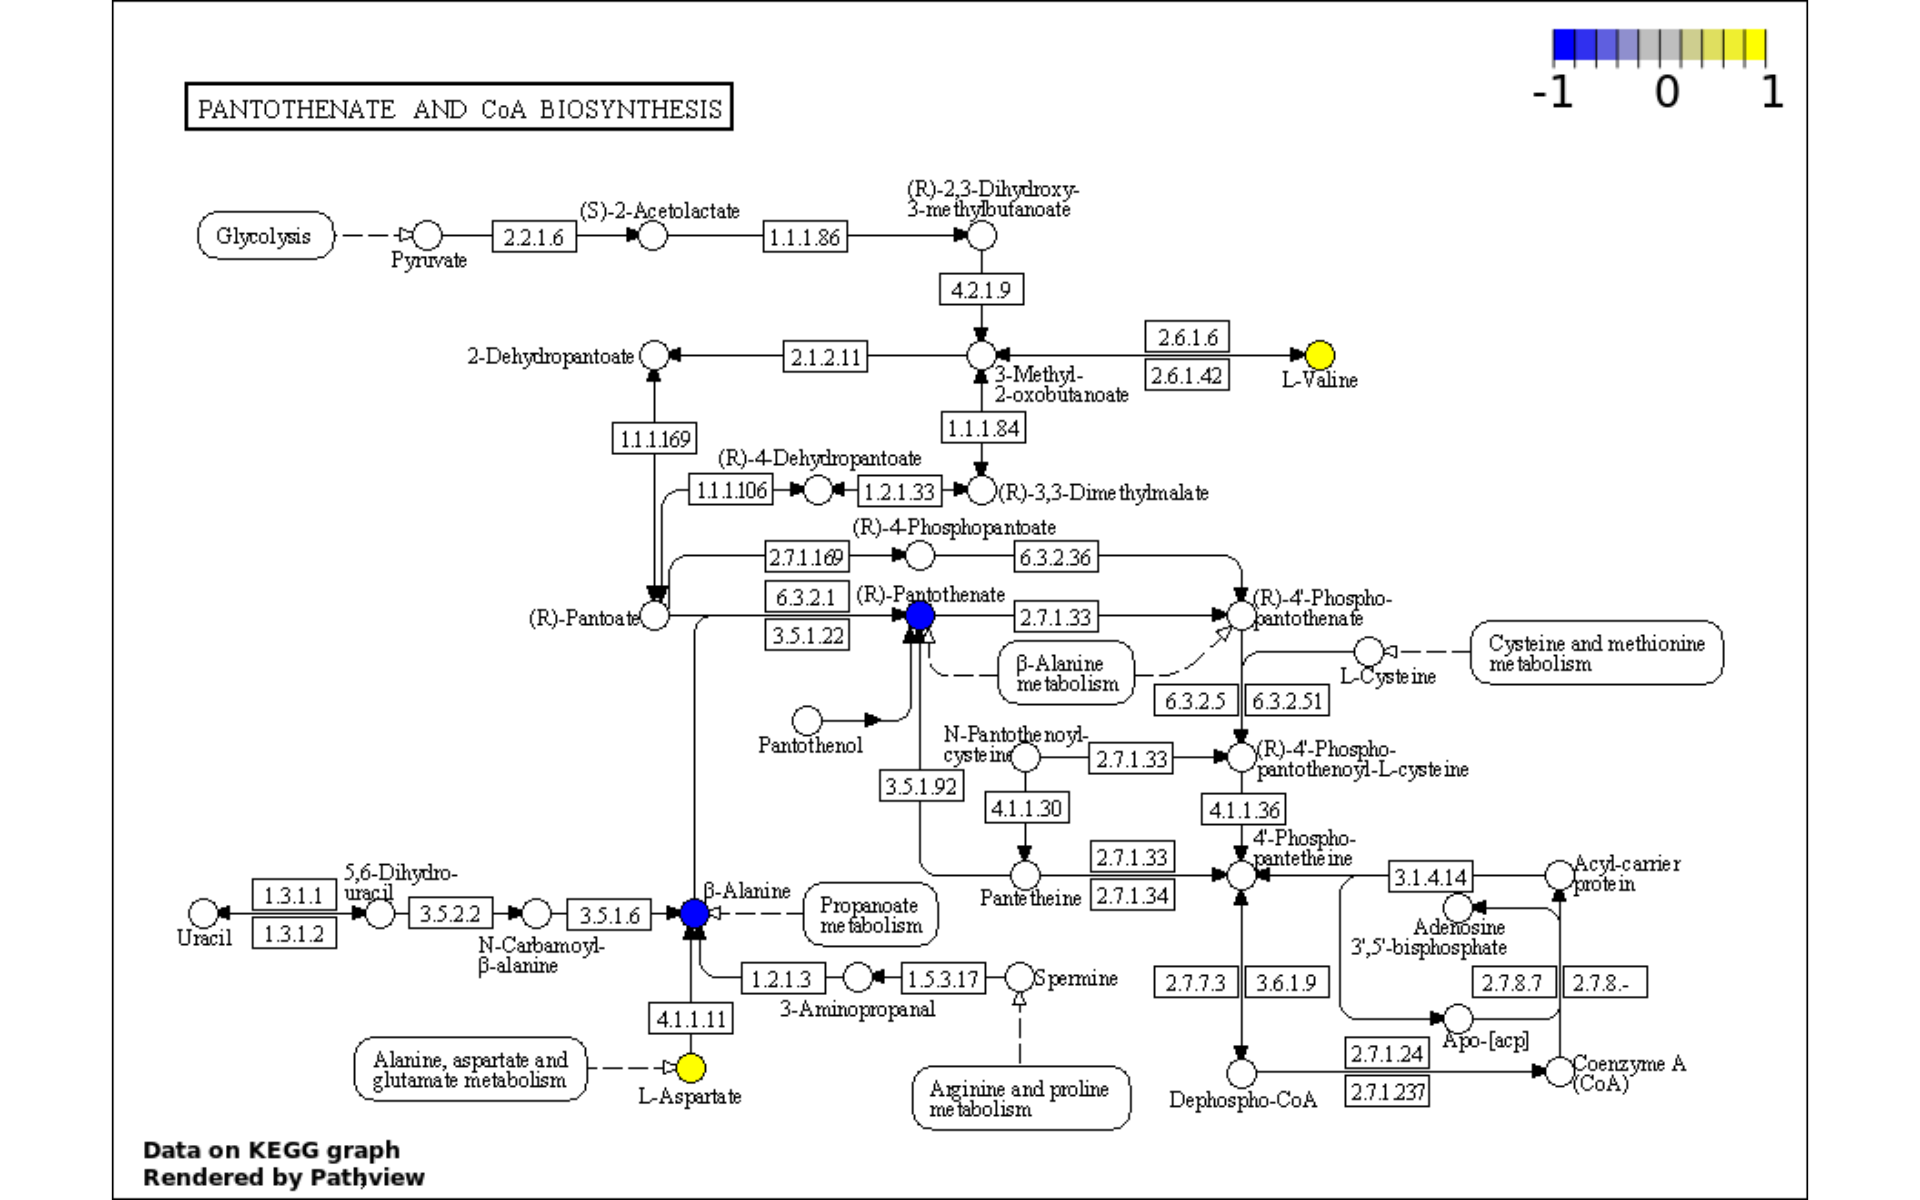

In [96]:
view_in_pathway(diff_exp_matrix,name_map,'Pantothenate and CoA biosynthesis')